In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import random
import re
import shutil
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dropout

In [2]:
base_dir = r"C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\LGG_HGG\train_test_val"
os.listdir(base_dir)

['test', 'train', 'val']

In [3]:
train_path = base_dir + '/train/'
test_path = base_dir + '/test/'
validation_path = base_dir + '/val/'
print("train path:", train_path)
print("test path:", test_path)
print("validation path:", validation_path)

train path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\LGG_HGG\train_test_val/train/
test path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\LGG_HGG\train_test_val/test/
validation path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\LGG_HGG\train_test_val/val/


In [4]:
os.listdir(test_path)

['HGG', 'LGG']

In [4]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

In [7]:
image_generator.flow_from_directory(train_path)

Found 661 images belonging to 2 classes.


In [8]:
image_generator.flow_from_directory(test_path)

Found 221 images belonging to 2 classes.


In [9]:
image_generator.flow_from_directory(validation_path)

Found 220 images belonging to 2 classes.


In [10]:
## Modelo VGG19

In [21]:
Eff_model = EfficientNetB1(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(240,240,3),
                    pooling='max',
                    classes= 2
                )

for layer in Eff_model.layers:
    layer.trainable = False

In [22]:
model_class_1 = Sequential([
    Eff_model,
    Dense(2056,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1280, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax')
])

In [14]:
model_class_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1280)             6575239   
                                                                 
 dense (Dense)               (None, 2560)              3279360   
                                                                 
 batch_normalization (BatchN  (None, 2560)             10240     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1280)              3278080   
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1024)              1

In [23]:
model_class_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=5e-04) ,loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [24]:
batch_size = 32

In [25]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 660 images belonging to 2 classes.


In [26]:
validation_image_generator = image_generator.flow_from_directory(validation_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 219 images belonging to 2 classes.


In [27]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary',
                                                            shuffle = False)

Found 223 images belonging to 2 classes.


In [28]:
history = model_class_1.fit(train_image_generator, validation_data=validation_image_generator, epochs=20)

Epoch 1/20
21/21 [==============================] - 48s 1s/step - loss: 0.9736 - accuracy: 0.6530 - val_loss: 3.3047 - val_accuracy: 0.6849
Epoch 2/20
21/21 [==============================] - 29s 1s/step - loss: 0.8642 - accuracy: 0.7182 - val_loss: 1.3120 - val_accuracy: 0.6986
Epoch 3/20
21/21 [==============================] - 30s 1s/step - loss: 0.8331 - accuracy: 0.7303 - val_loss: 2.2616 - val_accuracy: 0.7032
Epoch 4/20
21/21 [==============================] - 29s 1s/step - loss: 0.7331 - accuracy: 0.7394 - val_loss: 3.9967 - val_accuracy: 0.6849
Epoch 5/20
21/21 [==============================] - 26s 1s/step - loss: 0.6306 - accuracy: 0.7758 - val_loss: 2.3598 - val_accuracy: 0.5068
Epoch 6/20
21/21 [==============================] - 27s 1s/step - loss: 0.6249 - accuracy: 0.7818 - val_loss: 1.5391 - val_accuracy: 0.7397
Epoch 7/20
21/21 [==============================] - 27s 1s/step - loss: 0.6604 - accuracy: 0.7515 - val_loss: 1.5072 - val_accuracy: 0.7580
Epoch 8/20
21/21 [==

In [36]:
y_pred = model.predict(test_image_generator)
y_pred = np.argmax(y_pred, axis=1)

19/19 [==============================] - 55s 3s/step


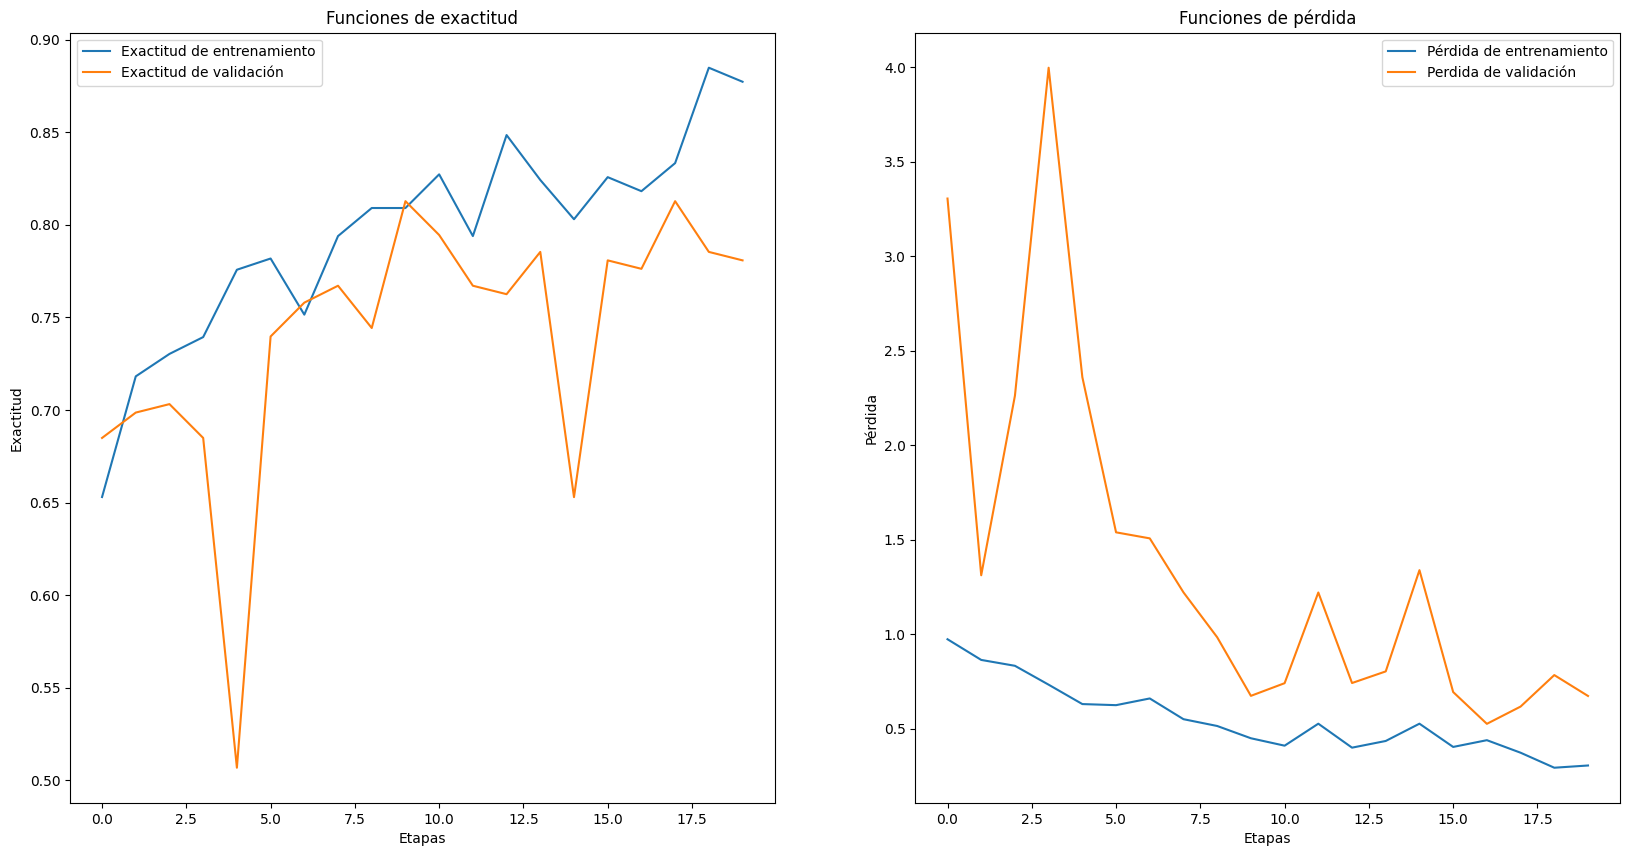

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

ax[0].plot(acc, label = 'Exactitud de entrenamiento')
ax[0].plot(val_acc, label = 'Exactitud de validación')
ax[0].set_xlabel('Etapas')
ax[0].set_ylabel('Exactitud')
ax[0].set_title('Funciones de exactitud')
ax[0].legend()


ax[1].plot(loss, label = 'Pérdida de entrenamiento')
ax[1].plot(val_loss, label = 'Perdida de validación')
ax[1].set_xlabel('Etapas')
ax[1].set_ylabel('Pérdida')
ax[1].set_title('Funciones de pérdida')
ax[1].legend()

In [30]:
# Predicción sobre los datos de prueba
y_pred_probs = model_class_1.predict(test_image_generator, steps=len(test_image_generator), verbose=1)

# Convertir probabilidades en clases predichas (índices)
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Extraer las etiquetas reales desde el generador
y_true = test_image_generator.classes
print(y_true)

7/7 [==============================] - 12s 1s/step
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [36]:
print(y_pred_probs_1.shape)

(394, 4)


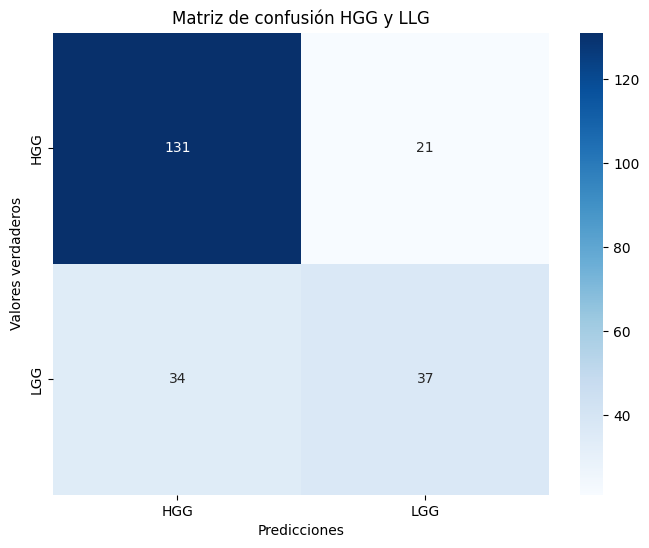

              precision    recall  f1-score   support

         HGG       0.79      0.86      0.83       152
         LGG       0.64      0.52      0.57        71

    accuracy                           0.75       223
   macro avg       0.72      0.69      0.70       223
weighted avg       0.74      0.75      0.75       223



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["HGG", "LGG"], yticklabels=["HGG", "LGG"])
plt.xlabel("Predicciones")
plt.ylabel("Valores verdaderos")
plt.title("Matriz de confusión HGG y LLG")
plt.show()

# Imprimir un reporte de clasificación
report = classification_report(y_true, y_pred, target_names=["HGG", "LGG"])
print(report)


In [ ]:
metricas para el modelo con Lr = 0.0001

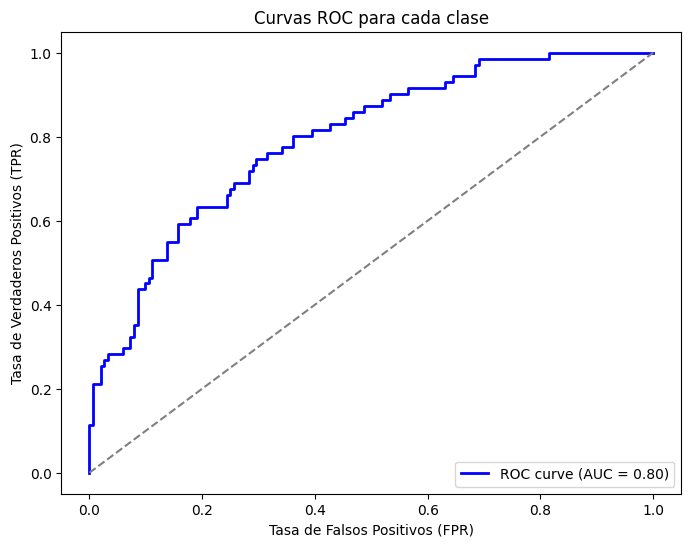

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC para la clase positiva
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])  # Usamos la columna de la clase 1
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.show()

In [38]:
test_data = model.evaluate(test_image_generator)
print("Validation Loss :",test_data[0])
print("Validation Accuracy :",test_data[1])

NameError: name 'model' is not defined